In [1]:
# importing the libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Text(0,0.5,'Count')

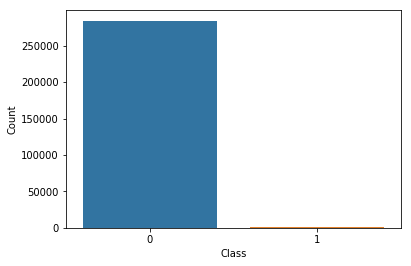

In [4]:
sns.countplot(x='Class', data=df)
plt.xlabel('Class')
plt.ylabel('Count')

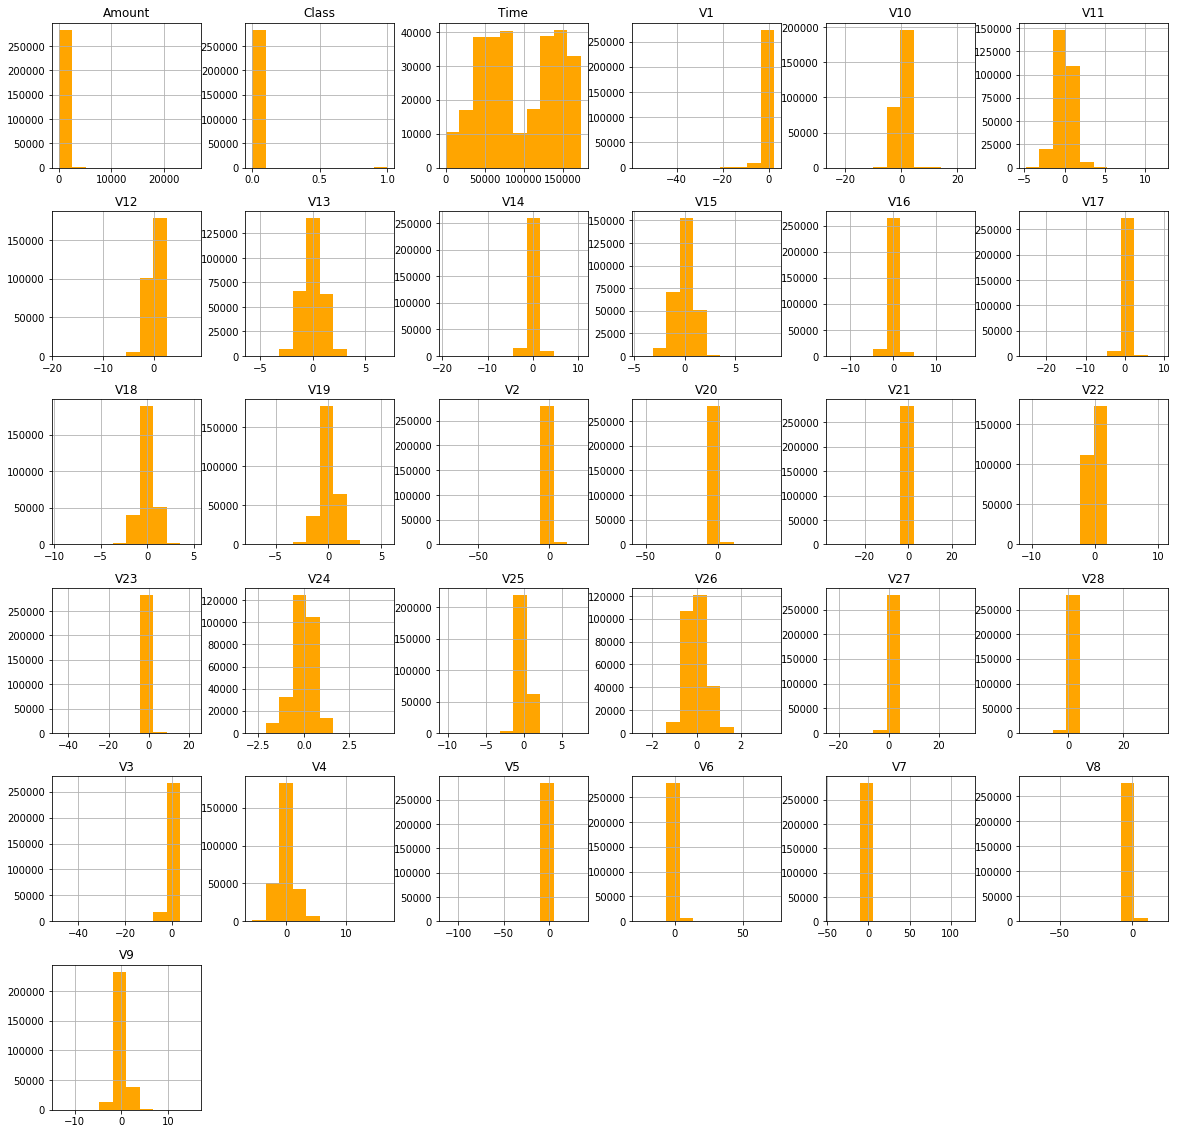

In [7]:
df.hist(figsize=(20,20), color='orange')
plt.show()

ploting time vs amount for both the classes to understand the anomalies

Text(0,0.5,'Amount')

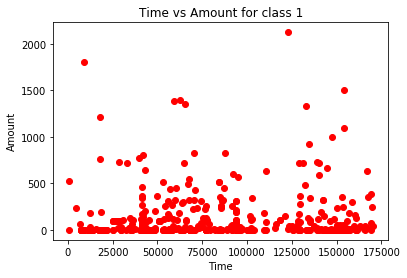

In [8]:
plt.scatter(x=df[df.Class == 1]['Time'], y=df[df.Class == 1]['Amount'], color='red')
plt.title('Time vs Amount for class 1')
plt.xlabel('Time')
plt.ylabel('Amount')

Text(0,0.5,'Amount')

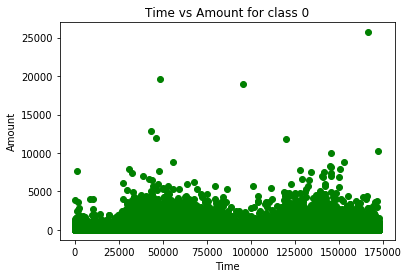

In [9]:
plt.scatter(x=df[df.Class == 0]['Time'], y=df[df.Class == 0]['Amount'], color='green')
plt.title('Time vs Amount for class 0')
plt.xlabel('Time')
plt.ylabel('Amount')

In [10]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA

In [12]:
# building isolation forest model
# fitting the data

model = IsolationForest()
model.fit(df.drop(['Time', 'Class'], axis=1))

/home/kinshuk/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


IsolationForest(bootstrap=False, contamination=0.1, max_features=1.0,
        max_samples='auto', n_estimators=100, n_jobs=1, random_state=None,
        verbose=0)

In [13]:
# calculating accuracy for detecting legit entries

legit = df[df.Class == 0]
pred_legit = model.predict(legit)
accuracy_legit = list(pred_legit).count(1)/pred_legit.shape[0]
print('Accuracy in detecting legit entries: {}'.format(accuracy_legit))

Accuracy for detecting legit entries: 0.839414030212968


In [14]:
# calculating accuracy for detecting fraud entries

fraud = df[df.Class == 1]
pred_fraud = model.predict(fraud)
accuracy_fraud = list(pred_fraud).count(-1)/pred_fraud.shape[0]
print('Accuracy in detecting fraud entries: {}'.format(accuracy_fraud))

Accuracy in detecting fraud entries: 0.9126016260162602


Plotting the predicted anomalies in 2D, for that PCA is implemeted for for dimensionality reduction

In [15]:
data = df.drop(['Time', 'Class'], axis=1)
pca = PCA(n_components=2)
res = pd.DataFrame(pca.fit_transform(data), columns=['PC1', 'PC2'])
res['Anomaly'] = model.predict(data)

In [16]:
res.head()

,PC1,PC2,Anomaly
0,61.271382,1.319427,1
1,-85.661826,-1.043819,1
2,290.316696,0.810805,1
3,35.151659,0.928318,1
4,-18.360281,1.317146,1


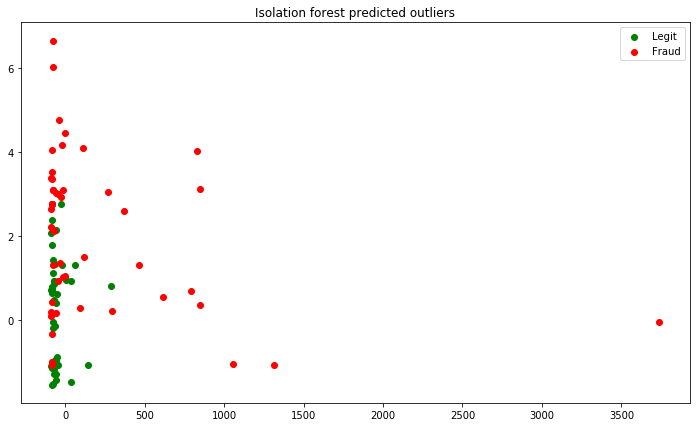

In [18]:
plt.figure(figsize=(12,7))
fig_1 = plt.scatter(x=res[res['Anomaly'] == 1]['PC1'].head(50), 
                    y=res[res['Anomaly'] == 1]['PC2'].head(50), 
                    color='green',
                    label='Legit')

fig_2 = plt.scatter(x=res[res['Anomaly'] == -1]['PC1'].head(50), 
                    y=res[res['Anomaly'] == -1]['PC2'].head(50), 
                    color='red',
                    label='Fraud')

plt.title('Isolation forest predicted outliers')
plt.legend(loc='upper right')